# <font color=black><center> Redes Neurais e Algoritmos Genéticos
# <font color=black><center> Monstrinho 3.5
## <font color=black><center> Forma, função e ativação

Gabriel Martins Sousa
    
## <font color=blue><center> == Neurônios Multifuncionais ==
## Introdução
Existem vários parâmetros na construção de uma rede neural e seus neurônios, como a quantidade de camadas, os pesos dos dados, os viéses do neurônios, e o parâmetro que iremos estudar hoje, as **funções de ativação neuronais**. Elas são fundamentais no processamento dos dados nos neurônios e na saída deles, atribuindo não-linearidade ao modelo de Aprendizado de Máquina e permitindo previsões mais complexas. As funções de ativação operam na soma dos dados com seus viéses e decidem se o neurônio será ativado ou não (se sua informação será passada a frente ou não).
    
![img](Funcoes_Ativacao.png)
    
Dependendo da aplicação da Rede Neural, é possível escolher diversas funções de ativação que se adequam melhor ao propósito do usuário. Neste notebook, iremos apresentar 3 funções de ativação, além da função **Sigmoidal**, a função **Tangente Hiperbólica**, a função **Unidade linear retificada (ReLU)** e a função **ReLU paramétrica (PReLU)**. Vamos apresentar suas vantagens e desvantagens e testá-las nos nossos dados a fim de minimizar a função de perda.
    
## Fundamentos teóricos
### - Sigmoid
A função sigmoidal modifica a entrada para um intervalo entre 0 e 1. Essa função é geralmente usada em Redes Neurais para classificação binária. Matematicamente, ela é definida pela função: $$f(x) = \frac {1} {1 + e^{-x}}$$

#### Vantagens:
* Retorna valores entre 0 e 1, muito útil para representar probabilidades.

#### Desvantagens:
* Quando os dados são muito grandes ou pequenos, os gradientes se tornam extremamente pequenos, tornando mais lento ou parando o processo de treinamento do modelo.
* Retornos entre 0 e 1 podem causar ineficiências nas atualizações de peso durante o treinamento.
* Há uma grande perda de dados, pois o intervalo de entrada é transformado em um valor entre 0 e 1.    

### - Tangente Hiperbólica (tanh)
A função tanh é um tipo de função de ativação que transforma o valor de entrada entre -1 e 1. Tanh tem uma curva em forma de S semelhante à função sigmóide, mas a curva tanh é simétrica em torno de zero. Ela é definida pela fórmula: $$f(x) = \frac {e^{x} - e^{-x}} {e^{x} + e^{-x}}$$
    
#### Vantagens:
* As saídas são distribuídas de maneira simétrica em torno de 0, o que ajuda a equilibrar as atualizações de gradiente durante a backpropagation
* Comparado à sigmoidal, o gradiente de Tanh é mais acentuado, o que, normalmente, gera uma convergência mais rápida durante o processo de treinamento.
    
#### Desvantagens:
* Semelhante à função sigmóide, a derivada da função tanh torna-se muito pequena, mesmo para entradas maiores.
* Para valores de entrada muito grandes ou muito pequenos, a função tanh começa a saturar, ou seja, a saída se aproxima de 1 ou 1 e a função fica plana nesta região. Isso faz com que o gradiente se torne muito próximo de zero, dificultando as atualizações de peso durante o backpropagation
    
### - Unidade Linear Retificada (ReLU)
A ReLU é uma das funções de ativação mais populares em redes neurais, devido à sua simplicidade e eficiência. Em comparação com funções anteriores, como Sigmoid e Tanh, a ReLU melhora muito o desempenho do treinamento, oferecendo uma convergência mais rápida. ReLU gera 0 para entradas negativas e retorna o próprio valor de entrada para entradas positivas. Ela pode ser definido como: $$f(x) = max(0,x)$$
    
#### Vantagens:
- A capacidade do ReLU de produzir zero para entradas negativas introduz esparsidade na rede, o que significa que apenas uma fração dos neurônios é ativada a qualquer momento. Isso pode levar a uma computação mais eficiente e rápida
- Operações simples tornam o ReLU computacionalmente mais leve do que as funções anteriores.
- O ReLU não sofre tanto com o problema do gradiente de desaparecimento em comparação com o Sigmoid ou o Tanh, tornando-o ideal para redes mais profundas.
    
#### Desvantagens:
- Quando muitos neurônios produzem 0, pesos e desvios podem parar de ser atualizados durante o backpropagation, fazendo com que partes da rede "morram".
- Ao contrário de outras funções de ativação como sigmóide ou tanh, a ativação do ReLU é ilimitada no lado positivo, o que às vezes pode resultar em gradientes explosivos ao treinar redes profundas.
    
### ReLU paramétrico (PReLU)
Para mitigar o problema do ReLU moribundo, o Leaky ReLU introduz um pequeno gradiente para entradas negativas, preservando alguma atividade nos neurônios. O ReLU paramétrico é uma variante do  Leaky ReLU que incorpora um parâmetro que pode ser aprendido para controlar a inclinação de valores negativos. O PReLU permite que a inclinação seja ajustada durante o processo de treinamento, o que permite que a rede tenha uma inclinação ideal. Ela é definida matematicamente como: $$f(x_{i} = max(0, x_{i}) + a_{i}min(0, x_{i})$$

#### Vantagens:
- Ao contrário das funções de ativação fixa, o PReLU se adapta ao conjunto de dados aprendendo a inclinação para valores negativos.
- Reduz a morte dos neurônios enquanto otimiza o fluxo do gradiente.
- Particularmente útil em arquiteturas muito profundas que requerem controle dinâmico sobre gradientes de ativação.
    
#### Desvantagens:
- Como *a* é aprendido durante o treinamento, há um potencial de sobreajuste, principalmente com pequenos conjuntos de dados
- Aprender o parâmetro adiciona uma pequena sobrecarga em comparação com variantes ReLU mais simples.

## Desenvolvimento

A Rede Neural abaixo foi escrita em Python puro pelo Professor Doutor Daniel Cassar. Iremos adaptá-la para atribuir diferentes funções de ativação para os neurônios da rede.

Todas os valores numéricos, entradas e saídas da nossa Rede Neural são elementos da classe `Valor`. Todas as operações entre esses valores são realizados através de métodos dessa classe, portanto, precisamos definir métodos que realizem as funções de ativação que iremos explorar nesse notebook.

In [1]:
import math

class Valor:
    def __init__(self, data, progenitor=(), operador_mae="", rotulo=""):
        self.data = data
        self.progenitor = progenitor
        self.operador_mae = operador_mae
        self.rotulo = rotulo
        self.grad = 0

    def __repr__(self):
        return f"Valor(data={self.data})"
    
    def __add__(self, outro_valor):
        """Realiza a operação: self + outro_valor."""
        
        if not isinstance(outro_valor, Valor):
            outro_valor = Valor(outro_valor)
            
        progenitor = (self, outro_valor)
        data = self.data + outro_valor.data
        operador_mae = "+"
        resultado = Valor(data, progenitor, operador_mae)
        
        def propagar_adicao():
            self.grad += resultado.grad
            outro_valor.grad += resultado.grad
            
        resultado.propagar = propagar_adicao
        
        return resultado
    
    def __mul__(self, outro_valor):
        """Realiza a operação: self * outro_valor."""
        
        if not isinstance(outro_valor, Valor):
            outro_valor = Valor(outro_valor)
            
        progenitor = (self, outro_valor)
        data = self.data * outro_valor.data
        operador_mae = "*"
        resultado = Valor(data, progenitor, operador_mae)
        
        def propagar_multiplicacao():
            self.grad += resultado.grad * outro_valor.data # grad_filho * derivada filho em relação a mãe
            outro_valor.grad += resultado.grad * self.data
            
        resultado.propagar = propagar_multiplicacao
        
        return resultado
    
    def exp(self):
        """Realiza a operação: exp(self)"""
        progenitor = (self, )
        data = math.exp(self.data)
        operador_mae = "exp"
        resultado = Valor(data, progenitor, operador_mae)
        
        def propagar_exp():
            self.grad += resultado.grad * data 
        
        resultado.propagar = propagar_exp
        
        return resultado
    
    def __pow__(self, expoente):
        """Realiza a operação: self ** expoente"""
        assert isinstance(expoente, (int, float))
        progenitor = (self, )
        data = self.data ** expoente
        operador_mae = f"**{expoente}"
        resultado = Valor(data, progenitor, operador_mae)
        
        def propagar_pow():
            self.grad += resultado.grad * (expoente * self.data ** (expoente - 1))
        
        resultado.propagar = propagar_pow
        
        return resultado
    
    def __truediv__(self, outro_valor):
        """Realiza a operação: self / outro_valor"""
        return self * outro_valor ** (-1)
    
    def __neg__(self):
        """Realiza a operação: -self"""
        return self * -1
    
    def __sub__(self, outro_valor):
        """Realiza a operaçãoexp_2x = (self * 2).exp(): self - outro_valor"""
        return self + (-outro_valor)
    
    def __radd__(self, outro_valor):
        """Realiza a operação: outro_valor + self"""
        return self + outro_valor
    
    def __rmul__(self, outro_valor):
        """Realiza a operação: outro_valor * self"""
        return self * outro_valor
    
    def sig(self):
        """Realiza a funçaõ sigmoidal de operação: exp(self) / (exp(self) + 1)"""
        return self.exp() / (self.exp() + 1)
    
    def tanh(self):
        """Realiza a função tangente hiperbólica: tanh(x) = (exp(2x) - 1) / (exp(2x) + 1)"""
        exp_2x = (self * 2).exp()
        return (exp_2x - 1) / (exp_2x + 1)
    
    def relu(self):
        """Realiza a função ReLU = max(0, self)"""
        data = max(0, self.data)
        progenitor = (self,)
        resultado = Valor(data, progenitor, "ReLU")

        def propagar_relu():
            if self.data > 0:
                p = 1
            else:
                p = 0
            self.grad += resultado.grad * p

        resultado.propagar = propagar_relu

        return resultado

    def prelu(self, a):
        """Realiza a função de ReLU paramétrico treinável. Precisa de um valor inicial de a para treinar"""
        if self.data > 0:
            data = self.data
            p = 1
            q = 0
        else:
            data = a.data * self.data
            p = a.data
            q = self.data
        resultado = Valor(data, (self, a), "PReLU")
        
        def propagar_prelu():
            self.grad += resultado.grad * p
            a.grad += resultado.grad * q
            
        resultado.propagar = propagar_prelu
        
        return resultado
    
    def propagar(self):
        pass
    
    def propagar_tudo(self):
        
        self.grad = 1
        
        ordem_topologica = []
        
        visitados = set()

        def constroi_ordem_topologica(v):
            if v not in visitados:
                visitados.add(v)
                for progenitor in v.progenitor:
                    constroi_ordem_topologica(progenitor)
                ordem_topologica.append(v)

        constroi_ordem_topologica(self)
        
        for vertice in reversed(ordem_topologica):
            vertice.propagar()

Com os métodos definidos, temos que configurar nossos neurônios para utilizarem a função de ativação que iremos explorar. Nesse primeiro teste, iremos usar a função de ativação **Sigmoide**. Isso é feito na célula abaixo:

In [2]:
import random

class Neuronio:
    def __init__(self, num_dados_entrada):
        self.vies = Valor(random.uniform(-1, 1)) # Valor aleatório
        
        self.pesos = []
        for i in range(num_dados_entrada):
            self.pesos.append(Valor(random.uniform(-1, 1)))
            
    def __call__(self, x):
        
        assert len(x) == len(self.pesos)
        
        soma = 0
        for info_entrada, peso_interno in zip(x, self.pesos):
            soma += info_entrada * peso_interno
            
        soma += self.vies  
        dado_de_saida = soma.sig()
        
        return dado_de_saida       
    
    def parametros(self):
        return self.pesos + [self.vies]

Criamos a nossa camada como um conjunto de neurônios.

In [3]:
class Camada:
    def __init__(self, num_neuronios, num_dados_entrada):
        neuronios = []
        
        for _ in range(num_neuronios):
            neuronio = Neuronio(num_dados_entrada)
            neuronios.append(neuronio)
            
        self.neuronios = neuronios     
        
    def __call__(self, x):
        dados_de_saida = []
        
        for neuronio in self.neuronios:
            informacao = neuronio(x)
            dados_de_saida.append(informacao)
            
        if len(dados_de_saida) == 1:
            return dados_de_saida[0]
        else:        
            return dados_de_saida  
    
    def parametros(self):
        params = []
        
        for neuronio in self.neuronios:
            params_neuronio = neuronio.parametros()
            params.extend(params_neuronio)
        
        return params

Criamos a nossa Rede Neural MLP como um conjunto de camadas.

In [4]:
class MLP:
    def __init__(self, num_dados_entrada, num_neuronios_por_camada):
        
        percurso = [num_dados_entrada] + num_neuronios_por_camada
        
        camadas = []
        
        for i in range(len(num_neuronios_por_camada)):
            camada = Camada(num_neuronios_por_camada[i], percurso[i])
            camadas.append(camada)
            
        self.camadas = camadas
        
    def __call__(self, x):
        for camada in self.camadas:
            x = camada(x)
        return x
    
    def parametros(self):
        params = []
        
        for camada in self.camadas:
            parametros_camada = camada.parametros()
            params.extend(parametros_camada)
            
        return params

Vamos testá-la com um conjunto genérico de dados. Temos os nossos dados de treinamento e os dados de teste. Definimos o número de dados de entrada e de saída da rede, e a arquitetura interna da função.

In [5]:
x = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]

y_true = [1, 0, 0.2, 0.5]

NUM_DADOS_DE_ENTRADA = 3  
NUM_DADOS_DE_SAIDA = 1    
CAMADAS_OCULTAS = [3, 2]  

arquitetura_da_rede = CAMADAS_OCULTAS + [NUM_DADOS_DE_SAIDA]

minha_mlp = MLP(NUM_DADOS_DE_ENTRADA, arquitetura_da_rede)

Vamos realizar o treinamento em 200 épocas, com uma taxa de aprendizado de 0.5 a cada época. Em seguida, calcularemos a função de perda, que nesse caso é a **soma do erro quadrático**, para avaliarmos ao final o desempenho da rede com as diferentes funções de ativação.

In [6]:
NUM_EPOCAS = 200
TAXA_DE_APRENDIZADO = 0.5

for epoca in range(NUM_EPOCAS):
    # forward pass
    y_pred = []
    for exemplo in x:
        previsao = minha_mlp(exemplo)
        y_pred.append(previsao)

    # loss
    erros = []
    for yt, yp in zip(y_true, y_pred):
        residuo = yp - yt
        erro_quadratico = residuo ** 2
        erros.append(erro_quadratico)        
    loss = sum(erros)

    # zero grad
    for p in minha_mlp.parametros():
        p.grad = 0

    # backpropagation
    loss.propagar_tudo()

    # atualiza parâmetros
    for p in minha_mlp.parametros():
        p.data = p.data - p.grad * TAXA_DE_APRENDIZADO

    # mostra resultado (opcional)
    print(epoca, loss.data)

0 0.8046483588730833
1 0.7439667315622607
2 0.6856431519417667
3 0.6345678749822218
4 0.5941464493944904
5 0.5650265536155656
6 0.5454464910874975
7 0.5326459687626648
8 0.5240828010195806
9 0.5179222149322344
10 0.513013225705738
11 0.5086923361508157
12 0.504596133782623
13 0.5005314148654217
14 0.4963969806241712
15 0.49213999538448405
16 0.48773273136805734
17 0.4831605612686857
18 0.478415912347884
19 0.4734952957717854
20 0.4683978881794844
21 0.46312487889726156
22 0.4576791820833785
23 0.4520653113485969
24 0.44628931503014746
25 0.4403587211423446
26 0.4342824668985933
27 0.42807080122542757
28 0.4217351561790418
29 0.41528798770637254
30 0.4087425892101152
31 0.40211288351158514
32 0.395413200298263
33 0.3886580470642033
34 0.3818618819140428
35 0.37503889641892235
36 0.3682028160264462
37 0.3613667244127616
38 0.3545429167290131
39 0.347742785061853
40 0.34097673772841997
41 0.3342541523819392
42 0.32758336141732025
43 0.32097166691325807
44 0.3144253813758715
45 0.307949889

In [7]:
y1 = y_pred
print(y1)

[Valor(data=0.860612161246576), Valor(data=0.07747354498277176), Valor(data=0.2100206568284082), Valor(data=0.517387353709461)]


In [8]:
e1 = loss.data
y_true

[1, 0, 0.2, 0.5]

Alguns previsões não se aproximaram tanto quanto desejado do valor real, mas de maneira branda foi um bom desempenho.

### Tangente hiperbólica

Agora, testaremos a função **Tangente Hiperbólica**. Vamos modificar a classe `Neurônio` e repetir o resto do processo que definimos acima.

In [9]:
class Neuronio:
    def __init__(self, num_dados_entrada):
        self.vies = Valor(random.uniform(-1, 1)) # Valor aleatório
        
        self.pesos = []
        for i in range(num_dados_entrada):
            self.pesos.append(Valor(random.uniform(-1, 1)))
            
    def __call__(self, x):
        
        assert len(x) == len(self.pesos)
        
        soma = 0
        for info_entrada, peso_interno in zip(x, self.pesos):
            soma += info_entrada * peso_interno
            
        soma += self.vies  
        dado_de_saida = soma.tanh()
        
        return dado_de_saida       
    
    def parametros(self):
        return self.pesos + [self.vies]

In [10]:
NUM_EPOCAS = 200
TAXA_DE_APRENDIZADO = 0.5

for epoca in range(NUM_EPOCAS):
    # forward pass
    y_pred = []
    for exemplo in x:
        previsao = minha_mlp(exemplo)
        y_pred.append(previsao)

    # loss
    erros = []
    for yt, yp in zip(y_true, y_pred):
        residuo = yp - yt
        erro_quadratico = residuo ** 2
        erros.append(erro_quadratico)        
    loss = sum(erros)

    # zero grad
    for p in minha_mlp.parametros():
        p.grad = 0

    # backpropagation
    loss.propagar_tudo()

    # atualiza parâmetros
    for p in minha_mlp.parametros():
        p.data = p.data - p.grad * TAXA_DE_APRENDIZADO

    # mostra resultado (opcional)
    print(epoca, loss.data)

0 0.025599216966889427
1 0.025368360150686945
2 0.02514120316280535
3 0.024917668112949806
4 0.02469767896182054
5 0.024481161477712732
6 0.024268043193865958
7 0.024058253366571067
8 0.023851722934044074
9 0.023648384476070664
10 0.023448172174426872
11 0.0232510217740771
12 0.023056870545150678
13 0.022865657245696183
14 0.02267732208521075
15 0.022491806688942212
16 0.022309054062958987
17 0.02212900855998174
18 0.021951615845972005
19 0.021776822867469153
20 0.02160457781966841
21 0.021434830115231087
22 0.02126753035381839
23 0.021102630292337898
24 0.020940082815894077
25 0.020779841909430358
26 0.02062186263005389
27 0.02046610108002929
28 0.020312514380432578
29 0.020161060645450778
30 0.020011698957317466
31 0.019864389341871274
32 0.019719092744724595
33 0.01957577100803228
34 0.019434386847845448
35 0.01929490383204052
36 0.019157286358809682
37 0.019021499635701794
38 0.01888750965920022
39 0.018755283194827135
40 0.01862478775776107
41 0.01849599159395651
42 0.018368863661

In [11]:
y_true

[1, 0, 0.2, 0.5]

In [12]:
y2 = y_pred
print(y2)
e2 = loss.data

[Valor(data=0.9238674190729115), Valor(data=0.053509945109826595), Valor(data=0.2007520719181443), Valor(data=0.5033785952634151)]


Apenas por esses valores, parece que, com a função Tanh, houve previsões mais precisas.

### ReLU

Explorando agora a função **ReLU**, vamos modificar o neurônio para executar essa função.

In [13]:
class Neuronio:
    def __init__(self, num_dados_entrada):
        self.vies = Valor(random.uniform(-1, 1))
        
        self.pesos = []
        for i in range(num_dados_entrada):
            self.pesos.append(Valor(random.uniform(-1, 1)))
            
    def __call__(self, x):
        
        assert len(x) == len(self.pesos)
        
        soma = 0
        for info_entrada, peso_interno in zip(x, self.pesos):
            soma += info_entrada * peso_interno
            
        soma += self.vies  
        dado_de_saida = soma.relu()
        
        return dado_de_saida       
    
    def parametros(self):
        return self.pesos + [self.vies]

In [14]:
NUM_EPOCAS = 200
TAXA_DE_APRENDIZADO = 0.5

for epoca in range(NUM_EPOCAS):
    # forward pass
    y_pred = []
    for exemplo in x:
        previsao = minha_mlp(exemplo)
        y_pred.append(previsao)

    # loss
    erros = []
    for yt, yp in zip(y_true, y_pred):
        residuo = yp - yt
        erro_quadratico = residuo ** 2
        erros.append(erro_quadratico)        
    loss = sum(erros)

    # zero grad
    for p in minha_mlp.parametros():
        p.grad = 0

    # backpropagation
    loss.propagar_tudo()

    # atualiza parâmetros
    for p in minha_mlp.parametros():
        p.data = p.data - p.grad * TAXA_DE_APRENDIZADO

    # mostra resultado (opcional)
    print(epoca, loss.data)

0 0.008641708609043263
1 0.008612149130131398
2 0.00858278426411076
3 0.008553612114233472
4 0.008524630808161902
5 0.008495838497580016
6 0.008467233357812362
7 0.008438813587449747
8 0.008410577407982315
9 0.00838252306343945
10 0.008354648820036102
11 0.008326952965826044
12 0.008299433810361268
13 0.008272089684357848
14 0.008244918939367869
15 0.008217919947457415
16 0.008191091100890523
17 0.008164430811818694
18 0.008137937511976398
19 0.008111609652381795
20 0.008085445703043035
21 0.00805944415266987
22 0.00803360350839044
23 0.00800792229547303
24 0.007982399057053122
25 0.007957032353864952
26 0.007931820763978126
27 0.00790676288253876
28 0.007881857321515397
29 0.007857102709449126
30 0.007832497691208312
31 0.007808040927747708
32 0.007783731095871559
33 0.007759566888001032
34 0.0077355470119456066
35 0.00771167019067852
36 0.007687935162116025
37 0.007664340678900542
38 0.007640885508187472
39 0.007617568431435769
40 0.007594388244202081
41 0.007571343755938272
42 0.007

In [15]:
y_true

[1, 0, 0.2, 0.5]

In [16]:
y3 = y_pred
print(y3)
e3 = loss.data

[Valor(data=0.9424746631317359), Valor(data=0.042195265726170675), Valor(data=0.2002511331139983), Valor(data=0.5014999226952007)]


As previsões se aproximaram bastante dos valores de teste, mas acho que podemos melhorar ainda mais essa performance.

### PReLu
Por último, vamos testar o desempenho da rede com a função **PReLU**.

In [17]:
class Neuronio:
    def __init__(self, num_dados_entrada):
        self.vies = Valor(random.uniform(-1, 1)) # Valor aleatório
        
        self.pesos = []
        for i in range(num_dados_entrada):
            self.pesos.append(Valor(random.uniform(-1, 1)))
            
    def __call__(self, x):
        
        assert len(x) == len(self.pesos)
        
        soma = 0
        for info_entrada, peso_interno in zip(x, self.pesos):
            soma += info_entrada * peso_interno
            
        soma += self.vies  
        dado_de_saida = soma.prelu()
        
        return dado_de_saida       
    
    def parametros(self):
        return self.pesos + [self.vies]

In [18]:
NUM_EPOCAS = 200
TAXA_DE_APRENDIZADO = 0.5

for epoca in range(NUM_EPOCAS):
    # forward pass
    y_pred = []
    for exemplo in x:
        previsao = minha_mlp(exemplo)
        y_pred.append(previsao)

    # loss
    erros = []
    for yt, yp in zip(y_true, y_pred):
        residuo = yp - yt
        erro_quadratico = residuo ** 2
        erros.append(erro_quadratico)        
    loss = sum(erros)

    # zero grad
    for p in minha_mlp.parametros():
        p.grad = 0

    # backpropagation
    loss.propagar_tudo()

    # atualiza parâmetros
    for p in minha_mlp.parametros():
        p.data = p.data - p.grad * TAXA_DE_APRENDIZADO

    # mostra resultado (opcional)
    print(epoca, loss.data)

0 0.0050812368468212575
1 0.005070599009964229
2 0.0050600039005050225
3 0.005049451264103397
4 0.0050389408484247285
5 0.005028472403120396
6 0.005018045679808324
7 0.0050076604320537016
8 0.004997316415350037
9 0.00498701338710044
10 0.00497675110659889
11 0.00496652933501208
12 0.004956347835361217
13 0.004946206372504035
14 0.004936104713117213
15 0.004926042625678748
16 0.0049160198804507615
17 0.0049060362494623
18 0.004896091506492464
19 0.004886185427053686
20 0.004876317788375226
21 0.004866488369386786
22 0.004856696950702385
23 0.004846943314604405
24 0.004837227245027781
25 0.004827548527544386
26 0.00481790694934765
27 0.004808302299237241
28 0.00479873436760397
29 0.0047892029464149475
30 0.004779707829198786
31 0.004770248811030992
32 0.00476082568851961
33 0.004751438259790857
34 0.004742086324475143
35 0.004732769683693052
36 0.004723488140041556
37 0.004714241497580378
38 0.004705029561818525
39 0.004695852139700944
40 0.004686709039595256
41 0.004677600071278842
42 0

In [19]:
y_true

[1, 0, 0.2, 0.5]

In [20]:
y4 = y_pred
print(y4)
e4 = loss.data

[Valor(data=0.9520413575282412), Valor(data=0.0356102156013077), Valor(data=0.20015296324178106), Valor(data=0.5008875609300548)]


Os resultados foram ainda mais próximos dos valores reais. O que indica que essa é a função mais adequada dentre as que testamos para essa Rede Neural específica de regressão.

Vamos analisar os erros desses modelos através de gráficos. O que a rede retorna é um objeto da classe `Valor`, porém, a biblioteca de plotagem `Matplotlib.pyplot` não entende o que são esses valores, por isso, vamos realizar a conversão dos objetos *"Valor"* para objetos do tipo *"float"*.

In [21]:
def conv_valor(lista):
    l = []
    for i in range(len(lista)):
        x = float(lista[i].data)
        l.append(x)
    return l

y1r = conv_valor(y1)
y2r = conv_valor(y2)
y3r = conv_valor(y3)
y4r = conv_valor(y4)
    
print(y1r)   
print(y2r)
print(y3r)
print(y4r)

[0.860612161246576, 0.07747354498277176, 0.2100206568284082, 0.517387353709461]
[0.9238674190729115, 0.053509945109826595, 0.2007520719181443, 0.5033785952634151]
[0.9424746631317359, 0.042195265726170675, 0.2002511331139983, 0.5014999226952007]
[0.9520413575282412, 0.0356102156013077, 0.20015296324178106, 0.5008875609300548]


Feito isso, vamos analisar a distribuição espacial dos dados previstos em relação ao dados reais.

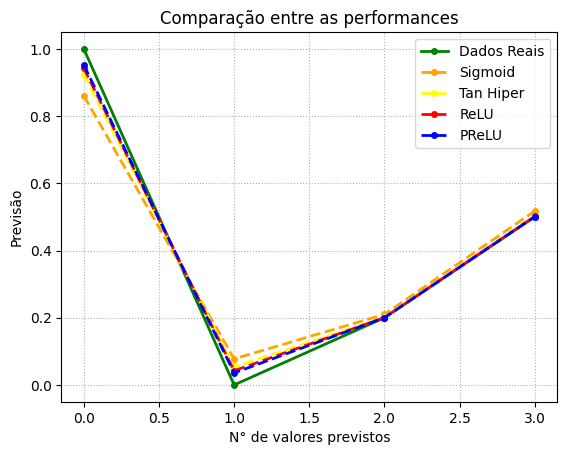

In [22]:
import matplotlib.pyplot as plt
import numpy as np

ey = np.arange(len(y_true))  # índice como eixo x

plt.plot(ey, y_true, marker='o', linestyle='-', linewidth=2, markersize=4, label='Dados Reais', color='green')
plt.plot(ey, y1r, marker='o', linestyle='--', linewidth=2, markersize=4, label='Sigmoid', color='orange')
plt.plot(ey, y2r, marker='o', linestyle='--', linewidth=2, markersize=4, label='Tan Hiper', color='yellow')
plt.plot(ey, y3r, marker='o', linestyle='--', linewidth=2, markersize=4, label='ReLU', color='red')
plt.plot(ey, y4r, marker='o', linestyle='--', linewidth=2, markersize=4, label='PReLU', color='blue')

plt.title('Comparação entre as performances')    
plt.xlabel('N° de valores previstos')   
plt.ylabel('Previsão')      
plt.grid(True, linestyle=":")    
plt.legend()    
plt.show()

É possível ver que a função Sigmoid não se aproxima tanto dos valores previstos, enquanto as funções Tanh, ReLU e PReLU estão bem próximas uma da outra, com diferenças menores da PReLU em relação aos dados reais.

Vamos agora analisar os modelos através da função de perda, que no caso dos nossos testes é a soma do erro quadrático.

C:\Users\gabriel24036\AppData\Local\Temp\ipykernel_31804\3798722222.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  eixo = sns.barplot(x=FUNCOES, y=ERROS, palette='viridis')


Text(0.5, 1.0, 'Comparação dos erros dos modelos')

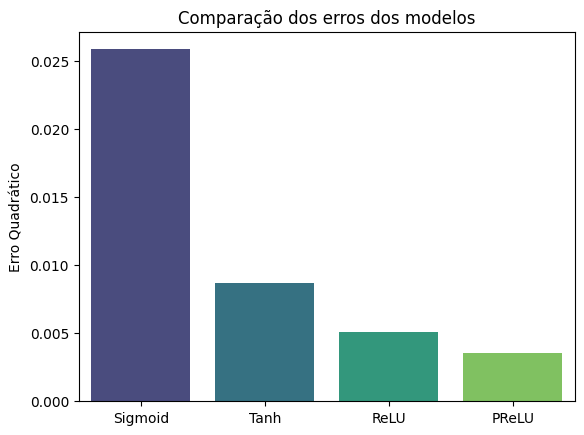

In [23]:
import seaborn as sns

FUNCOES = ["Sigmoid","Tanh","ReLU","PReLU"]
ERROS = [e1, e2, e3, e4]

plt.figure()
eixo = sns.barplot(x=FUNCOES, y=ERROS, palette='viridis')
eixo.set_ylabel('Erro Quadrático')
plt.title("Comparação dos erros dos modelos")

Visivelmente, a função Sigmoid erra mais do que as outras, enquanto a PReLU tem uma leve vantagem em relação a ReLU e a Tanh.

## Conclusão
Através dos testes, foi possível explorar as 4 funções de ativação propostas em um problema de regressão. Obtivemos resultados melhores com a função PReLU, mas as funções ReLU e Tanh também proporcionam um bom desempenho. Não é possível definir que uma função é melhor que a outra, pois há várias vantagens e desvantagens de cada uma, além de diferentes cenários nos quais é possível aplicá-las. Seriam necessários testes mais amplos para analisar melhor a performance dessas funções, mas isso não cabe no escopo dessa atividade.

## Referências
- NANDI, S. 12 Types of Activation Functions in Neural Networks: A Comprehensive Guide. Disponível em: <https://medium.com/@sushmita2310/12-types-of-activation-functions-in-neural-networks-a-comprehensive-guide-a441ecefb439>. Acesso em: 30 abr. 2025
- NAIR, G. Activation Function in Neural Networks: Sigmoid, Tanh, ReLU, Leaky ReLU, Parametric ReLU, ELU, Softmax, GeLU | Medium. Disponível em: <https://medium.com/@gauravnair/the-spark-your-neural-network-needs-understanding-the-significance-of-activation-functions-6b82d5f27fbf>.